# Graphics with Python

The visualzation of data sets is key for performing statistical analysis. For example, boxplots allow you to judge distribution of a sample, and also to compare samples to each other in order to estimate whether a particular test is suitable for your data. This chapter does not aim and educating you in how to generate the perfect plot, but it will enable you to visually inspect your data for the purpose of statistics.

## Boxplot

The boxplot is commonly used for visualizing a metric variable that is grouped by a factorial variable.

In [1]:
import pandas as pd
melon = pd.read_csv('data/melon.csv', sep='\t')

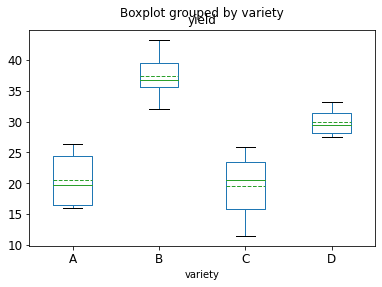

In [2]:
import matplotlib.pyplot as plt
bp = melon.boxplot(column=['yield'], by='variety', fontsize='large', showmeans=True,meanline=True, grid = False)

Manipulating plots is not always intuitive in Python... let's start with at least making the title look a bit nicer (i.e. not overlapping):

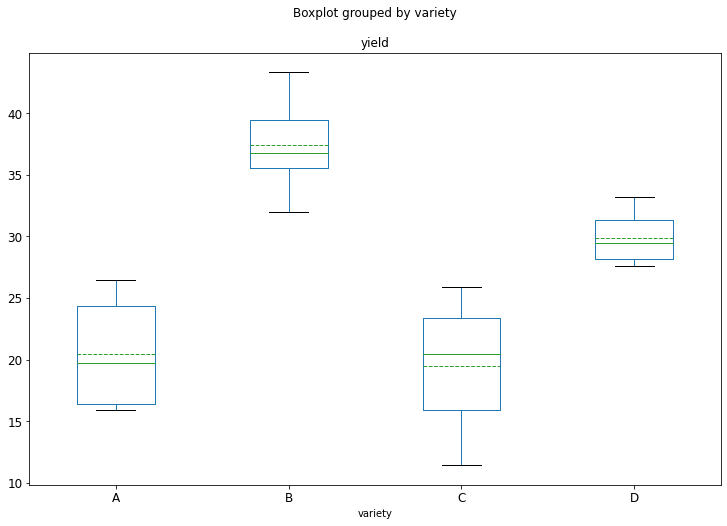

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
bp = melon.boxplot(column=['yield'], by='variety', fontsize='large', 
                   showmeans=True,meanline=True, grid = False, ax=ax)

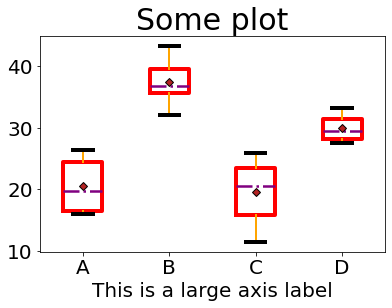

In [4]:
# many things can be set inside the boxplot function
bp = melon.boxplot(column=['yield'], by='variety',
                   fontsize='large', showmeans=True,
                   meanline=False, return_type='dict',
                   grid = False,
                   boxprops=dict(linestyle='-',
                                 linewidth=4, color='red'),
                   medianprops=dict(linestyle='-.',
                                    linewidth=2.5,
                                    color='purple'),
                   whiskerprops=dict(linestyle='-',
                                     linewidth=2.0,
                                     color='black'),
                   meanprops=dict(marker='D',
                                  markeredgecolor='black',
                                  markerfacecolor='firebrick'),
                   flierprops=dict(marker='o',
                                   markerfacecolor='green',
                                   markersize=12,
                                   linestyle='none'))

# if the return_type is dict, you can also modify later:
[[item.set_color('orange') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['caps']] for key in bp.keys()]

# axis, title etc. are under plt control:
plt.suptitle("")  # to remove boxplot default title
p = plt.gca()
p.set_title("Some plot", fontsize=30)
p.set_xlabel("This is a large axis label", fontsize = 20)
p.tick_params(axis='y', labelsize=20)
p.tick_params(axis='x', labelsize=20)


Further reading: <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html>.

## Histogram

Histograms are another way to visualize the distribution of your metric data

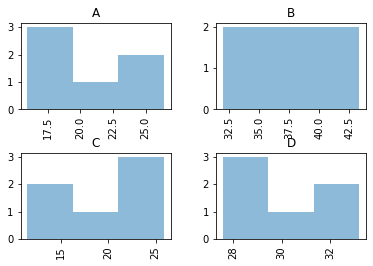

In [5]:
# the melon data set is only used for demonstration,
# histrograms generally make more sense for data sets
# with more replicates
melon_hist = melon['yield'].hist(by=melon['variety'],
                                 bins=3, alpha=0.5)

Further reading: <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html>.

## Scatterplot

Scatterplots are used for two metric variables.

   water  yield
0      0    9.0
1      0   10.3
2      0   11.5
3      0   14.2
4     48   12.2


<AxesSubplot:xlabel='water', ylabel='yield'>

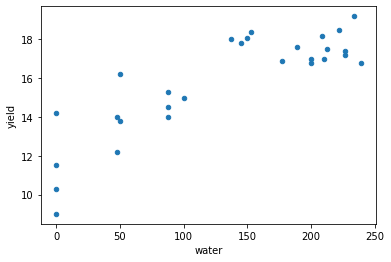

In [6]:
beets = pd.read_csv('data/beets.csv', sep='\t')
print(beets.head())
beets.plot.scatter(x = 'water', y = 'yield')


Further reading: <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html>.

## Exporting Figures

### PDF Format

Simply type <tt>plt.savefig("name.pdf")<tt> in the same code cell as your plotting comand:

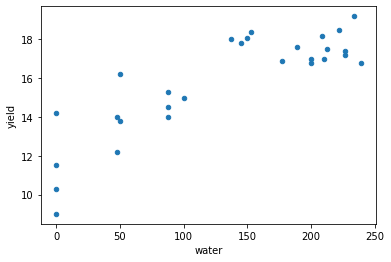

In [7]:
beets.plot.scatter(x = 'water', y = 'yield')
plt.savefig('figs/03_sample.pdf')

### PNG Format

The function <tt>plt.savefig()</tt> recognizes from the file ending which format to export to. Thus, you can use the same function as above for exporting to PNG format:

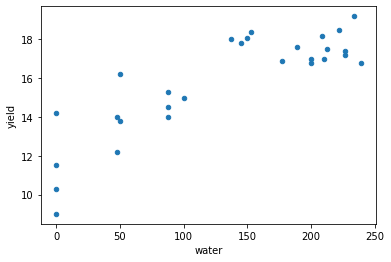

In [8]:
beets.plot.scatter(x = 'water', y = 'yield')
plt.savefig('figs/03_sample.png')

## Dash

If you are coming from R and you are a "Shiny" developer, then you might be wondering what compares to that in Python. You are looking for Dash. Dash is in some parts superior to Shiny, but in other parts, Shiny is better. You find an interestesting read at https://appsilon.com/dash-vs-shiny/.

<font size="3"><div class="alert alert-warning"><b>Exercise 3.1:</b> <br> 

Create a boxplot of the soil respiration data set. Export the plot to pdf format.
</div>
</font>

In [9]:
soil = pd.read_csv('data/soil_respiration.csv', sep='\t')
soil

,treatment,response
0,growth,17
1,growth,20
2,growth,170
3,growth,315
4,growth,22
5,growth,190
6,growth,64
7,growth,22
8,gap,29
9,gap,13


<font size="3">
<b>Try it yourself:</b></font>

**Example Solution**

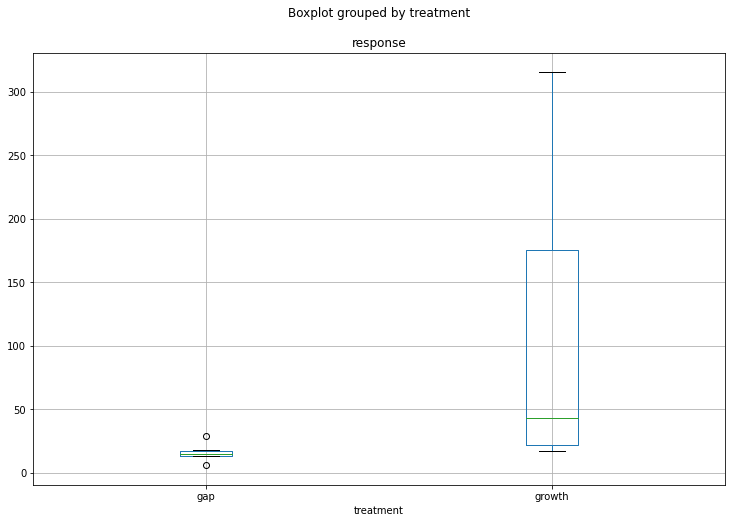

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
soil.boxplot(column=['response'], by='treatment', ax=ax)
plt.savefig('figs/03_soil_bxplt.pdf')

Further reading: 

   * <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html>
   
   * <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html>
   
   * <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html>


Not covered here, but awesome for producing beautiful plots:

<https://plot.ly/python/plotly-express/>